Average of each row across files for Column 1: 0    18.59
dtype: float64
Average of each row across files for Column 2: 0    20.41
dtype: float64
Overall average for Column 1: 18.59
Overall average for Column 2: 20.41


In [6]:
import pandas as pd
df = pd.read_csv('/data4/hnsw/TripClick/GroundTruth/Q4.csv')
df

,ID,distance
0,312092,27.6785
1,617336,27.9268
2,306184,28.0552
3,805744,30.0804
4,549691,30.5943
...,...,...
11417,717825,121.8170
11418,759392,124.6660
11419,182219,126.7480
11420,415368,132.4030


Total number of records across all files: 297496421
Average number of records per file (over 1000 files): 297496.42


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


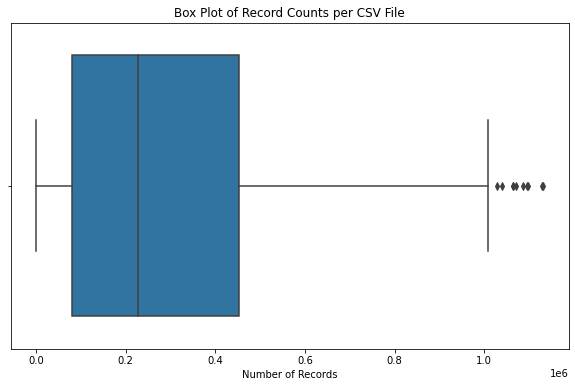

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the directory containing the CSV files
csv_directory = '/data4/hnsw/tripclick_full/GTRange'

# Initialize variables to store total records and file count
total_records = 0
file_count = 0
records_per_file = []  # List to store the number of records in each file

# Iterate over all files in the directory
for filename in os.listdir(csv_directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(csv_directory, filename)
        
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)
        
        # Count the number of records in the CSV file
        num_records = len(df)
        
        # Add the number of records to the total count
        total_records += num_records
        
        # Append the number of records to the list for plotting
        records_per_file.append(num_records)
        
        # Increment the file count
        file_count += 1

# Assuming there are 1000 files
expected_file_count = 1000

# Calculate the average number of records
average_records = total_records / expected_file_count

# Print the results
print(f'Total number of records across all files: {total_records}')
print(f'Average number of records per file (over {expected_file_count} files): {average_records:.2f}')

# Box plot to visualize the distribution of record counts per file
plt.figure(figsize=(10, 6))
sns.boxplot(records_per_file)
plt.title('Box Plot of Record Counts per CSV File')
plt.xlabel('Number of Records')

# Display the plot
plt.show()


In [20]:
# Save the final DataFrame to CSV with ";" as the separator
meta_data.to_csv("/data4/hnsw/tripclick_full/date_meta_data.csv", index=False)


In [ ]:
import os
import pandas as pd
from concurrent.futures import ProcessPoolExecutor

ground_truth_folder = '/home/u6059148/DataSet/GroundTruth/'
algorithm_folder = '/home/u6059148/Result/PostFiltering'
results = []

# List all files in the ground truth folder
ground_truth_files = os.listdir(ground_truth_folder)

# Function to process each file pair and count matches
def process_file(filename):
    ground_truth_file = os.path.join(ground_truth_folder, filename)
    algorithm_file = os.path.join(algorithm_folder, filename)
    
    if os.path.exists(algorithm_file):
        # Read only the 'ID' column for faster processing
        ground_truth_df = pd.read_csv(ground_truth_file, usecols=['ID']).head(10)  # First 10 records
        algorithm_df = pd.read_csv(algorithm_file, usecols=['ID']).drop_duplicates()

        # Use vectorized matching with isin
        match_count = algorithm_df['ID'].isin(ground_truth_df['ID']).sum()

        return {'query': filename, 'match': match_count}
    else:
        print(f"{filename}: Corresponding file not found in the algorithm folder.")
        return None

# Using ProcessPoolExecutor for parallel processing
with ProcessPoolExecutor() as executor:
    # Map the filenames to the process_file function and collect results
    results = list(filter(None, executor.map(process_file, ground_truth_files)))

# Save results to CSV
results_df = pd.DataFrame(results)
results_df.to_csv('/home/u6059148/Result/PostFiltering/Res500.csv', index=False)

print("Results have been written to Res400_.csv")


In [5]:


import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path = '/data4/hnsw/yt8m/GroundtruthViews/Q1400.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df

,ID,distance
0,550293,0.000
1,1271625,150.036
2,107050,153.223
3,598728,155.237
4,496991,156.223
5,89268,156.224
6,575910,156.344
7,1069007,156.351
8,391233,156.514
9,865773,156.988
